In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Machine learning/Dataset/master.csv")

#rename the columns using the AIBL outline

data.rename(columns={"PTGENDER": "Gender", "MHPSYCH": "Psychaitric",
                    "MH2NEURL": "Neurologic", "MH4CARD": "Cardiovascular",
                    "MH6HEPAT": "Hepatic", "MH8MUSCL": "Musculoskeletal",
                    "MH9ENDO": "Endocrine-Metabolic", "MH10GAST": "Gastrointestinal",
                    "MH12RENA": "Renal-Genitourinary", "MH16SMOK": "Smoking",
                    "MH17MALI": "Malignancy", "APGEN1": "Allele 1",
                    "APGEN2": "Allele 2", "AXT117": "Thyroid Stim",
                    "BAT126": "Vitamin B12", "HMT3": "Red Blood Cell",
                    "HMT7": "White Blood Cell", "HMT13": "Platelets",
                    "HMT40": "Haemoglobin", "HMT100": "Mean Corpuscular Haemoglobin",
                    "HMT102": "Mean Corpuscular Haemoglobin Concentration",
                    "RCT6": "Urea Nitrogen", "RCT11": "Serum GLucose", 
                    "RCT20": "Cholestrol", "RCT392": "Creatinine",
                    "CDGLOBAL": "Global CDR", "MMSCORE": "MMSE Total Score",
                    "LIMMTOTAL": "Logical Memory Immediate Recall",
                    "LDELTOTAL": "Logical Memory Delayed Recall"}, inplace=True)

data


,RID,Gender,Age,Psychaitric,Neurologic,Cardiovascular,Hepatic,Musculoskeletal,Endocrine-Metabolic,Gastrointestinal,...,Mean Corpuscular Haemoglobin Concentration,Urea Nitrogen,Serum GLucose,Cholestrol,Creatinine,Global CDR,MMSE Total Score,Logical Memory Immediate Recall,Logical Memory Delayed Recall,Diagnosis
0,2,1,74,0,1,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,1
1,3,2,76,1,0,0,0,0,0,1,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,1
2,4,2,93,0,0,1,0,1,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,1
3,5,1,82,0,0,1,0,0,1,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,2
4,10,1,90,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1632,1,74,0,0,0,0,0,1,1,...,34.3,26.431,91.882,158.526,0.713,0.5,27,6,6,2
858,1634,1,78,0,0,0,0,0,1,1,...,33.6,25.830,97.286,185.592,0.781,-4.0,20,5,4,1
859,1636,1,67,0,0,1,0,0,1,0,...,34.5,25.830,214.390,162.393,0.826,0.5,28,3,3,2
860,1637,1,68,0,0,0,0,1,0,0,...,33.8,20.424,100.890,297.721,0.792,0.5,28,8,12,2


In [2]:
#pre-processing
#https://www.v7labs.com/blog/data-preprocessing-guide

#since this dataset mostly contains sparse values, dimensionality reduction is needed
#https://www.analyticsvidhya.com/blog/2022/11/explaining-sparse-datasets-with-practical-examples/#:~:text=What%20are%20Sparse%20Datasets%3F,zero%20values%2C%20it%20is%20dense.
#examples: PCA

#apply clustering to identify groups of similar data points together based on the reduced set of features. 
#clustering can 


In [3]:
# get shape and description of the dataset

print(f"{data.shape}")
print(f"{data.describe()}")

(862, 32)
               RID      Gender         Age  Psychaitric  Neurologic  \
count   862.000000  862.000000  862.000000   862.000000  862.000000   
mean    822.064965    1.545244   77.682135     0.133411    0.073086   
std     514.455402    0.498238    7.090661     0.806231    0.626918   
min       2.000000    1.000000   58.000000    -4.000000   -4.000000   
25%     361.250000    1.000000   72.000000     0.000000    0.000000   
50%     787.000000    2.000000   77.000000     0.000000    0.000000   
75%    1330.750000    2.000000   82.000000     0.000000    0.000000   
max    1639.000000    2.000000  100.000000     1.000000    1.000000   

       Cardiovascular     Hepatic  Musculoskeletal  Endocrine-Metabolic  \
count      862.000000  862.000000       862.000000           862.000000   
mean         0.343387   -0.034803         0.412993             0.084687   
std          0.802404    0.579314         0.783819             0.736329   
min         -4.000000   -4.000000        -4.000000

In [4]:
#there are some columns with out of range values -4 
print(data.min())

#there are 28 features with out of range values

RID                                            2.0
Gender                                         1.0
Age                                           58.0
Psychaitric                                   -4.0
Neurologic                                    -4.0
Cardiovascular                                -4.0
Hepatic                                       -4.0
Musculoskeletal                               -4.0
Endocrine-Metabolic                           -4.0
Gastrointestinal                              -4.0
Renal-Genitourinary                           -4.0
Smoking                                       -4.0
Malignancy                                    -4.0
Allele 1                                      -4.0
Allele 2                                      -4.0
Thyroid Stim                                  -4.0
Vitamin B12                                   -4.0
Red Blood Cell                                -4.0
White Blood Cell                              -4.0
Platelets                      

In [5]:
# deal with out of range values first using linear interpolation

#first change -4 with nan 

dataNew = data.replace(-4, np.NaN)
print(f"The number of nan values before interpolation: {dataNew.isna().sum().sum()}")

dataNew = dataNew.interpolate(limit_direction='both')

print(f"The number of nan values after interpolation: {dataNew.isna().sum().sum()}")

#one missing nan value left 
# dataNew['Smoking'].fillna(value=dataNew['Smoking'].mean(), inplace=True)

The number of nan values before interpolation: 1255
The number of nan values after interpolation: 0


In [6]:
#drop the values for the target variable where its not 1,2 or 3

print(dataNew['Diagnosis'].value_counts())

dataNew = dataNew[(dataNew.Diagnosis != 7) & (dataNew.Diagnosis != 1.5)]

print(dataNew['Diagnosis'].value_counts())

dataNew

1.0    609
2.0    144
3.0    105
7.0      3
1.5      1
Name: Diagnosis, dtype: int64
1.0    609
2.0    144
3.0    105
Name: Diagnosis, dtype: int64


,RID,Gender,Age,Psychaitric,Neurologic,Cardiovascular,Hepatic,Musculoskeletal,Endocrine-Metabolic,Gastrointestinal,...,Mean Corpuscular Haemoglobin Concentration,Urea Nitrogen,Serum GLucose,Cholestrol,Creatinine,Global CDR,MMSE Total Score,Logical Memory Immediate Recall,Logical Memory Delayed Recall,Diagnosis
0,2,1,74,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16.0,14.0,1.0
1,3,2,76,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9.0,11.0,1.0
2,4,2,93,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9.0,2.0,1.0
3,5,1,82,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10.0,0.0,2.0
4,10,1,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1632,1,74,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,34.3,26.431,91.882,158.526,0.713,0.5,27,6.0,6.0,2.0
858,1634,1,78,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,33.6,25.830,97.286,185.592,0.781,0.5,20,5.0,4.0,1.0
859,1636,1,67,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,34.5,25.830,214.390,162.393,0.826,0.5,28,3.0,3.0,2.0
860,1637,1,68,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,33.8,20.424,100.890,297.721,0.792,0.5,28,8.0,12.0,2.0


In [7]:
#Seperate the independent continuous values to be standardized 
X_data = dataNew[["Age","Thyroid Stim","Vitamin B12","Red Blood Cell",
                    "White Blood Cell","Platelets","Haemoglobin","Mean Corpuscular Haemoglobin",
                    "Mean Corpuscular Haemoglobin Concentration",
                    "Urea Nitrogen","Serum GLucose", "Cholestrol","Creatinine",
                    "Global CDR","MMSE Total Score","Logical Memory Immediate Recall",
                    "Logical Memory Delayed Recall"]].reset_index(drop=True)


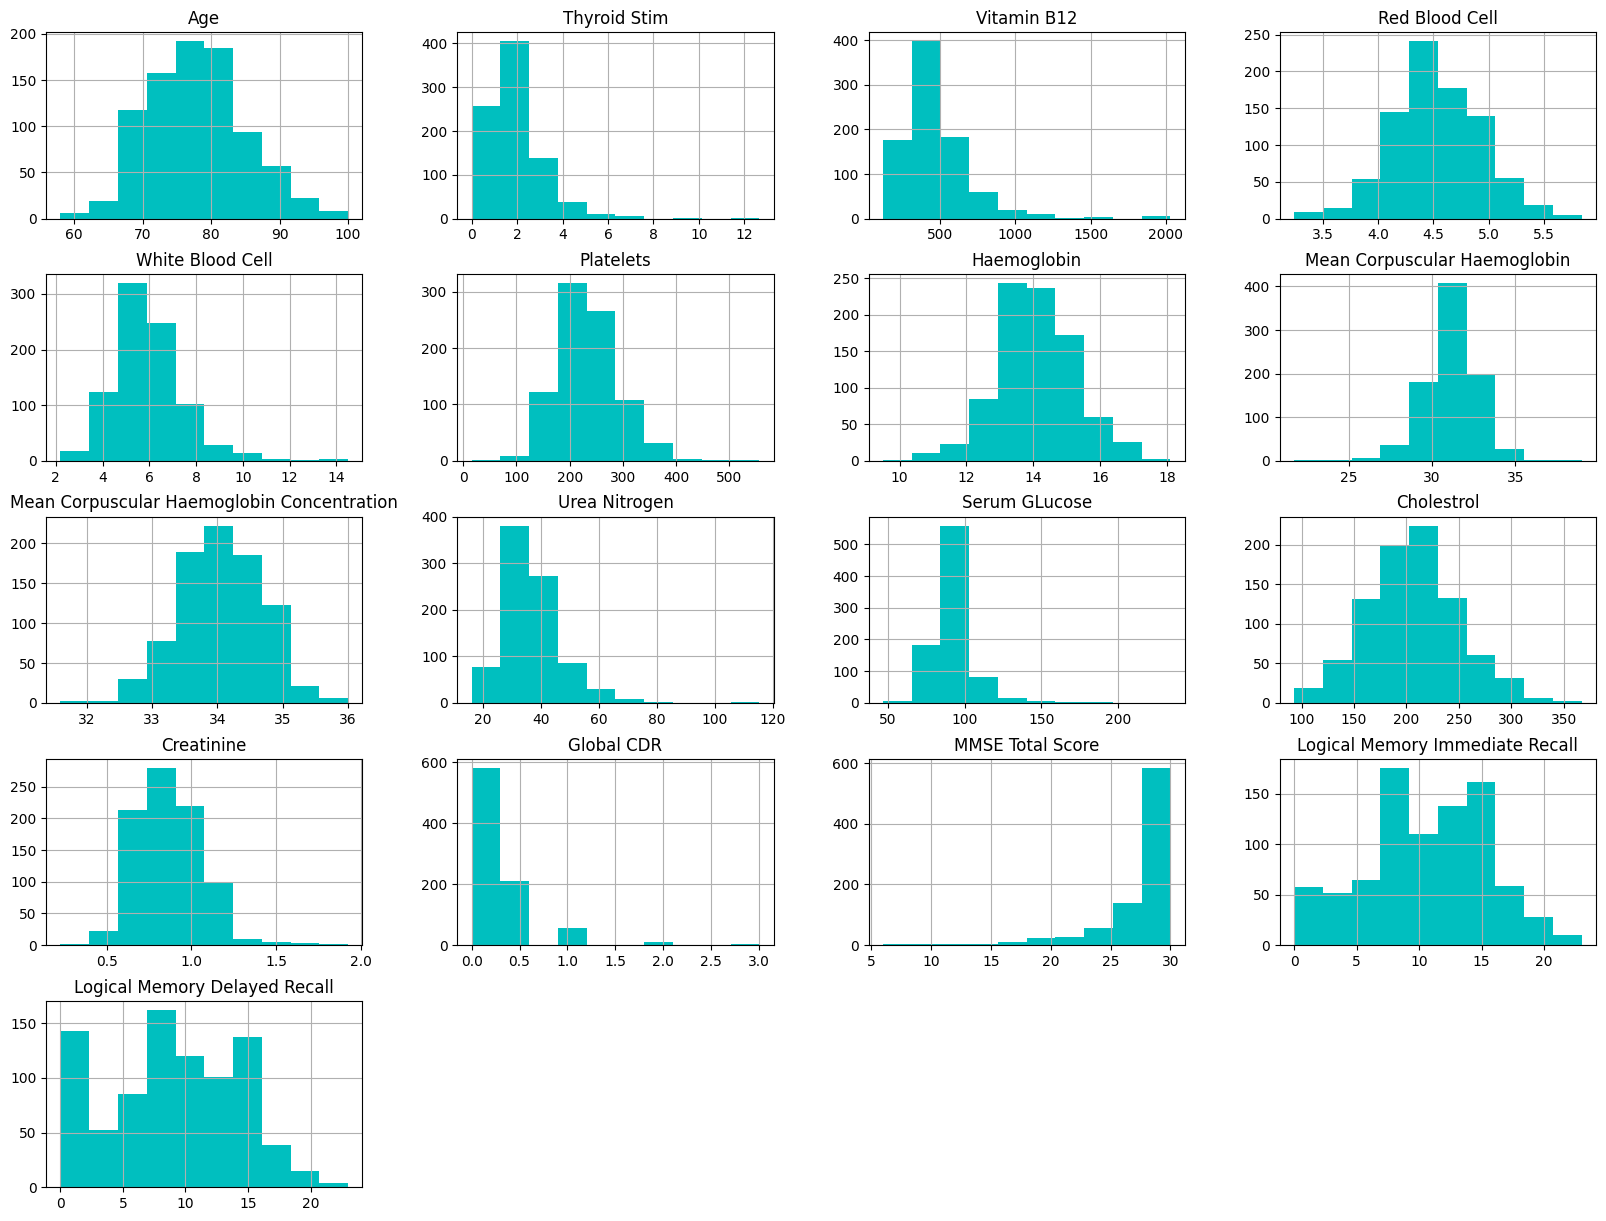

In [8]:
# Before we standardize, check for normal distributions between the continious variables

(X_data+0.001).hist(figsize=(20, 15), color = 'c');

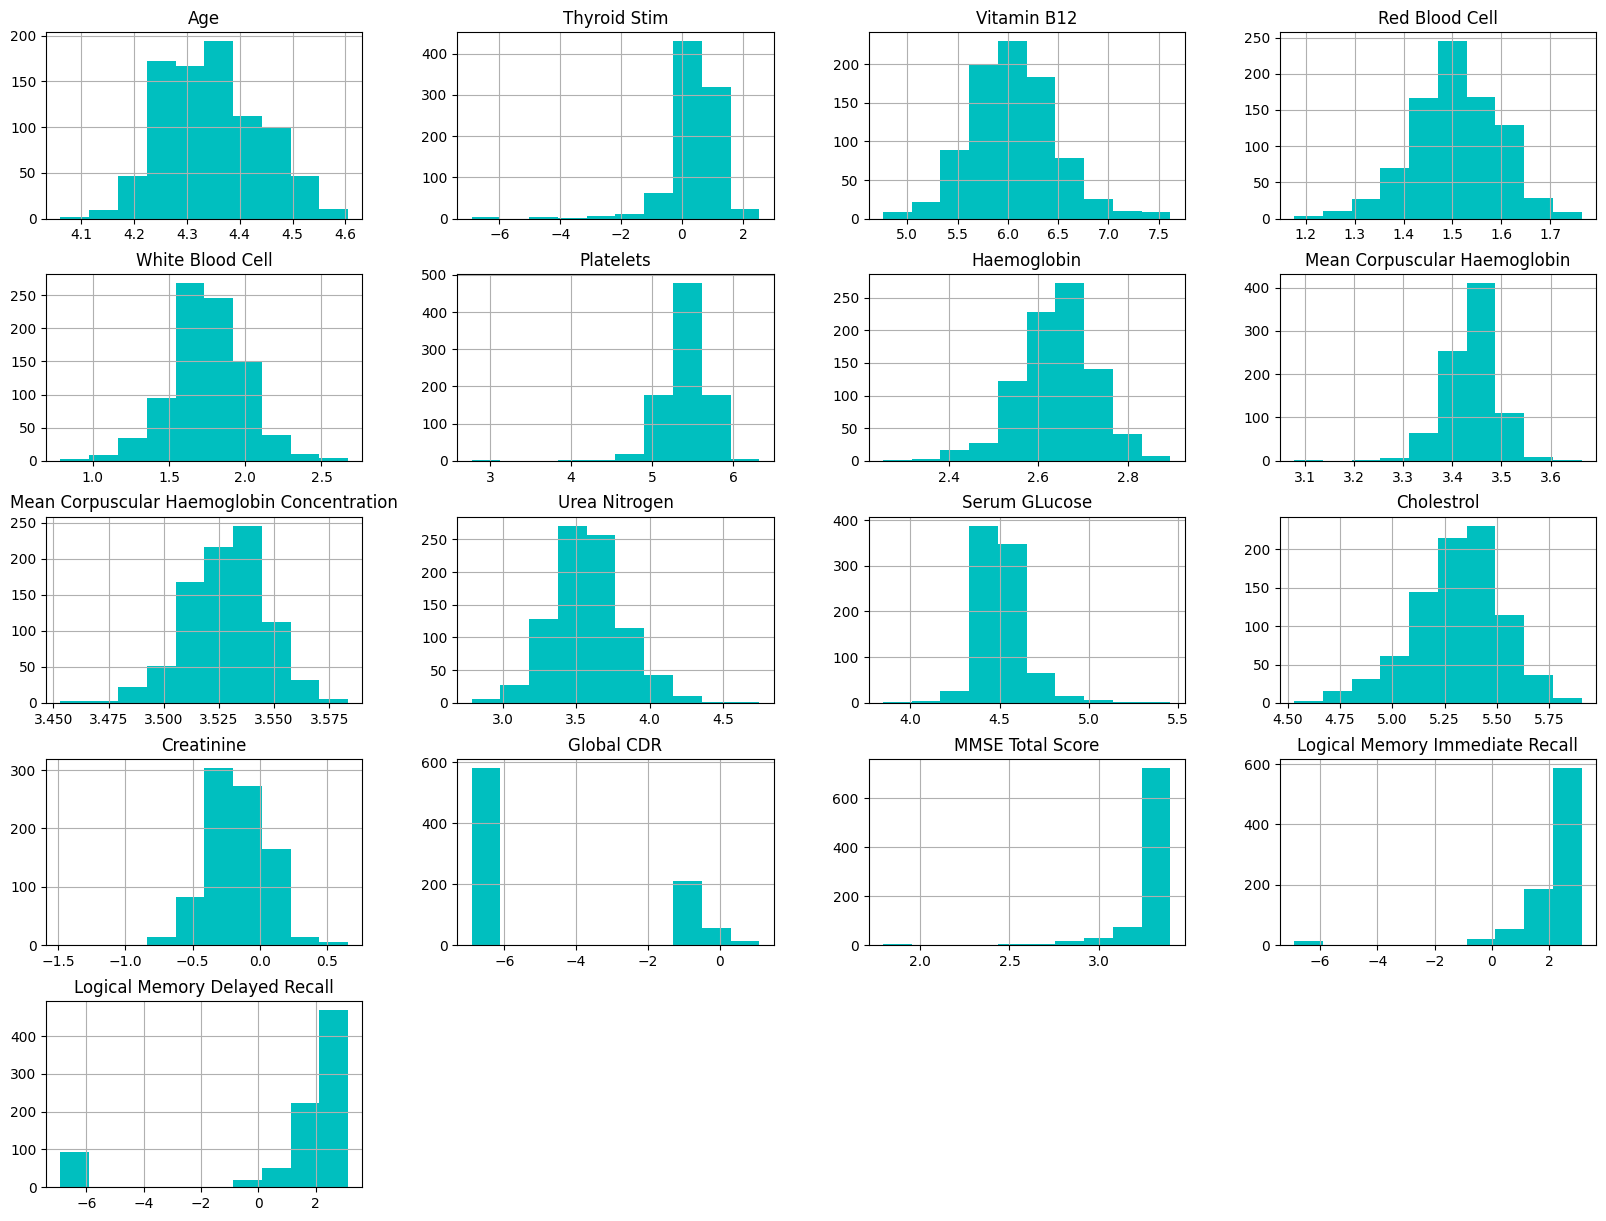

In [9]:
# Perform log transformation to make the data closer to a gaussian distribution

X_data = np.log(X_data+0.001)
X_data.hist(figsize=(20, 15), color = 'c');

In [10]:
#standardize the dataset with the continious variables

scaled = preprocessing.StandardScaler().fit_transform(X_data)

#convert X_scaled to dataframe
X_scaled = pd.DataFrame(scaled, columns=["Age","Thyroid Stim","Vitamin B12","Red Blood Cell",
                    "White Blood Cell","Platelets","Haemoglobin","Mean Corpuscular Haemoglobin",
                    "Mean Corpuscular Haemoglobin Concentration",
                    "Urea Nitrogen","Serum GLucose", "Cholestrol","Creatinine",
                    "Global CDR","MMSE Total Score","Logical Memory Immediate Recall",
                    "Logical Memory Delayed Recall"]).reset_index(drop=True)

print(X_scaled)

#next we concat the X_scaled to the rest of the dataset excluding the outcome variable

          Age  Thyroid Stim  Vitamin B12  Red Blood Cell  White Blood Cell  \
0   -0.496776     -0.230547     0.295797       -0.296784         -0.181061   
1   -0.201568     -0.185094    -0.127891       -1.706710         -0.408418   
2    2.033023     -0.167396     0.022167       -0.979548          0.679002   
3    0.639570     -0.132785    -0.373081        2.505352         -0.036278   
4    1.670051      1.771465    -0.478971       -0.554477         -0.732865   
..        ...           ...          ...             ...               ...   
853 -0.496776      0.048499     2.475540        0.442484          0.171642   
854  0.085972      1.176139     2.065714        0.370717         -1.178735   
855 -1.596794      1.469841     0.315065        1.894055          0.910702   
856 -1.432796      0.186096    -0.926032        1.873092          0.557990   
857  0.639570      0.186096    -0.818920        0.128114         -0.181061   

     Platelets  Haemoglobin  Mean Corpuscular Haemoglobin  \
0 

In [11]:
#Get the dependent and independent variables

X_data = pd.concat([dataNew[["Gender","Psychaitric","Neurologic","Cardiovascular",
                    "Hepatic","Musculoskeletal","Endocrine-Metabolic","Gastrointestinal",
                    "Renal-Genitourinary","Smoking","Malignancy","Allele 1",
                    "Allele 2"]].reset_index(drop=True), X_scaled.reset_index(drop=True)],axis=1)

Y_data = dataNew['Diagnosis'].reset_index(drop=True)

X_data.isnull().sum()

Gender                                        0
Psychaitric                                   0
Neurologic                                    0
Cardiovascular                                0
Hepatic                                       0
Musculoskeletal                               0
Endocrine-Metabolic                           0
Gastrointestinal                              0
Renal-Genitourinary                           0
Smoking                                       0
Malignancy                                    0
Allele 1                                      0
Allele 2                                      0
Age                                           0
Thyroid Stim                                  0
Vitamin B12                                   0
Red Blood Cell                                0
White Blood Cell                              0
Platelets                                     0
Haemoglobin                                   0
Mean Corpuscular Haemoglobin            

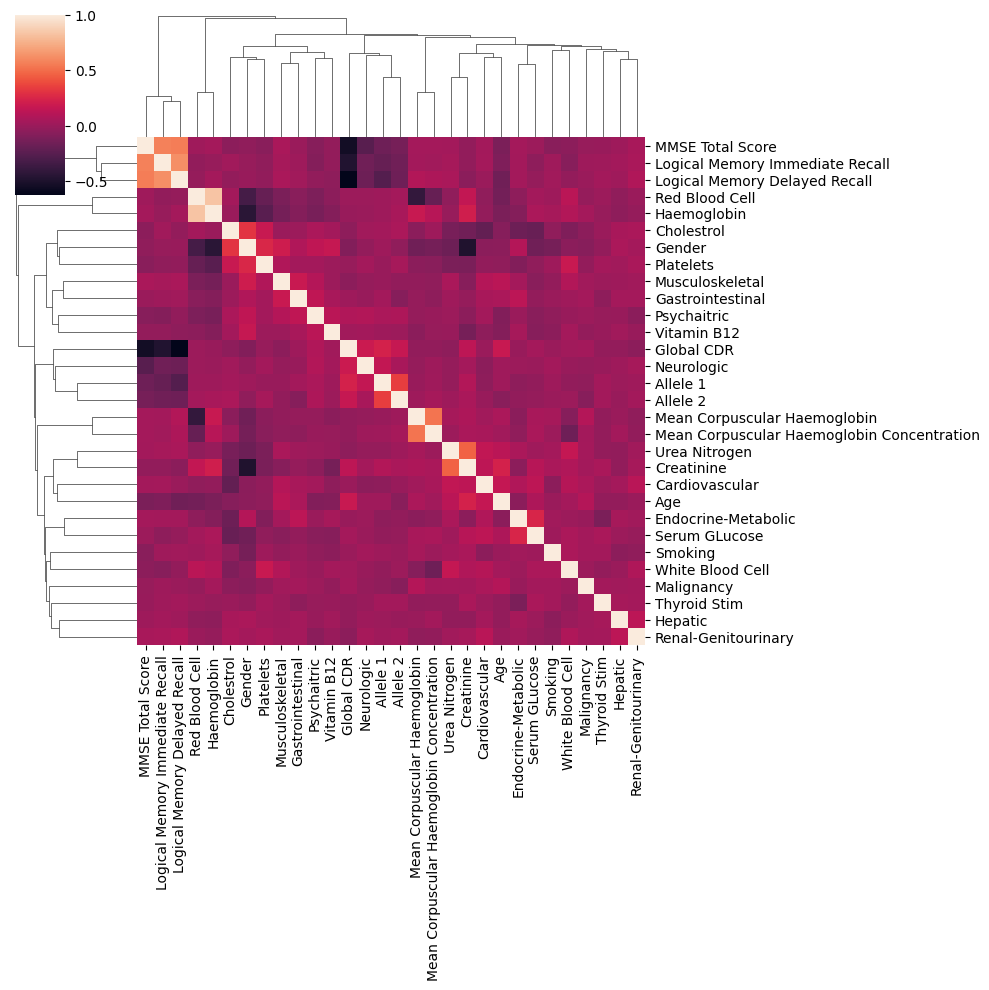

In [12]:
#next perform dimensionality reduction using PCA

sns.clustermap(X_data.corr())
plt.show()

#we can see that there is a significant correlation between the blood analyses so we have to reduce 
#dimensions so that the model is more optimal

Features before PCA: 30
Features after PCA: 17


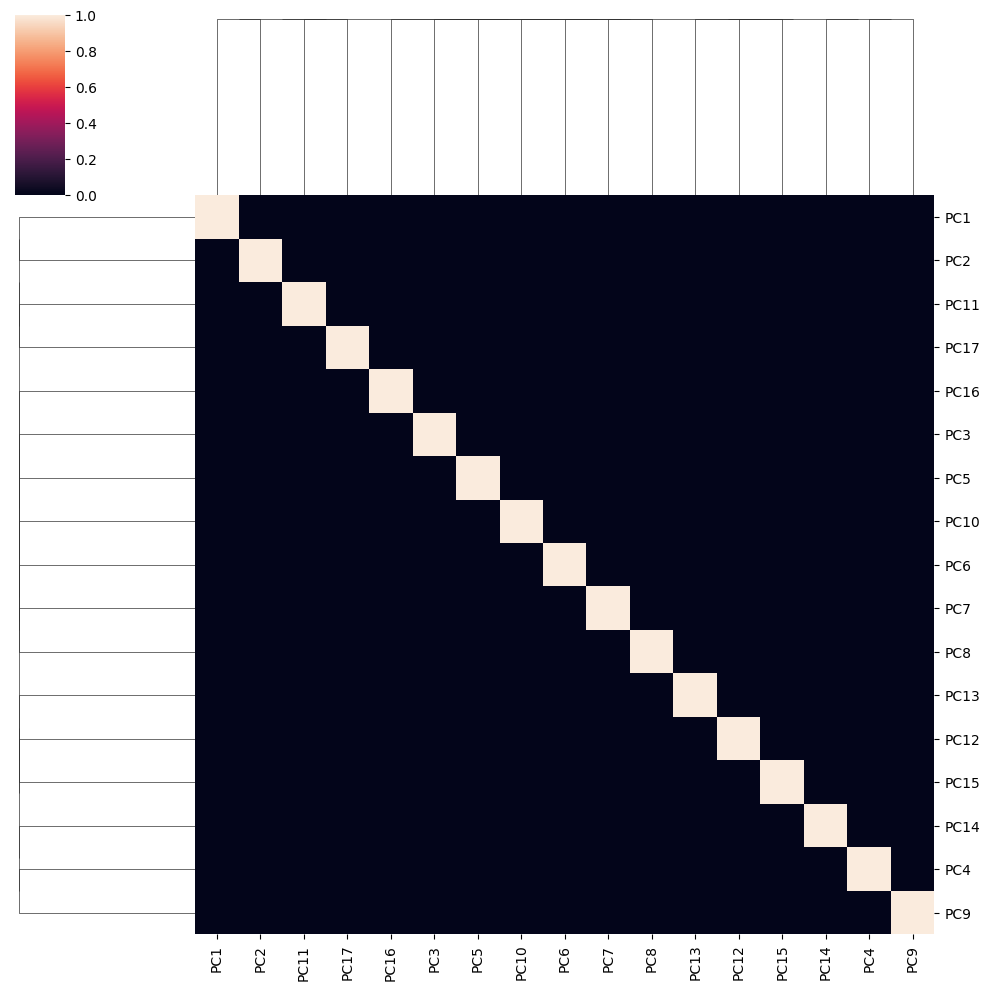

In [13]:
#PCA application

def pc():
    test = []
    for i in range( X_pca.shape[1]):
        test.append(f"PC{i+1}")
    
    return test

pca = PCA(n_components=0.90) # keep 90% of the variance 

X_pca = pca.fit_transform(X_data)

#convert the X_pca into dataframe
X_pcaDF = pd.DataFrame(X_pca, columns=pc())

print(f"Features before PCA: {X_data.shape[1]}")
print(f"Features after PCA: {X_pca.shape[1]}")

sns.clustermap(X_pcaDF.corr())
plt.show()

In [14]:
#concatenate the X_pca and the Y_data and make a 30% sample 
dataPCA = pd.concat([X_pcaDF.reset_index(drop=True), Y_data.reset_index(drop=True)], axis = 1)

sample = data.sample(frac = 0.3, random_state = 1)

dataPCA


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Diagnosis
0,-1.252740,-0.398263,-0.899329,-0.431969,-0.100874,-0.030459,0.630934,-0.231540,-0.522756,0.044577,-0.486143,-0.045252,-0.518335,-0.133812,-0.301792,0.355004,0.531419,1.0
1,-0.838344,2.414333,-0.512239,-1.097380,1.659625,-1.706974,-0.371298,0.700557,1.307520,-1.297540,0.210978,-0.875179,-0.470011,-0.844437,-1.749342,-0.293673,-0.632830,1.0
2,0.062048,0.842738,-1.708705,1.947423,-1.718108,-0.101918,-0.526088,0.396239,0.922938,0.322680,-0.172348,0.877549,-0.151238,-0.018653,0.275593,0.449081,0.015117,1.0
3,2.001854,-3.947244,0.662715,-0.234275,1.725795,0.650679,0.015510,0.354305,0.936667,-0.100881,-0.626989,-0.827045,1.110994,-1.154237,0.595901,1.364834,-0.132837,2.0
4,3.361628,-1.493651,-3.659858,-1.651098,1.766033,-1.029926,-1.044623,-1.126889,0.792964,0.194511,0.143405,-0.611718,-0.240887,-0.444473,0.153568,1.375443,-0.029418,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.544880,-0.452152,0.704339,-1.013066,1.752483,0.835087,2.467154,-1.418294,0.588683,0.919522,0.053324,-0.912339,0.719110,0.389818,-0.574837,-0.657921,0.632958,2.0
854,1.570297,-0.046924,0.776485,-1.106125,1.580856,0.255152,0.539880,-1.877689,0.919570,0.446050,-0.470012,-0.574972,-1.214150,1.395702,-0.405972,-0.464771,0.314527,1.0
855,0.996989,-2.754144,0.882545,-0.362606,3.860456,-4.480539,0.784469,-0.903358,1.314479,-2.759918,-0.023682,-0.510413,1.171340,0.142478,-0.022290,-0.662929,0.475090,2.0
856,0.066771,-1.995533,2.236969,-2.641711,0.049945,-1.274051,-0.681204,0.636763,0.333201,-0.116381,0.820149,-1.962139,-0.223707,-0.233447,-0.381282,-1.050554,-0.020839,2.0


In [15]:
#get the highest variables for each principal component

#loadings = pca.components_.T

#for i in range(pca.n_components_):
#    component_num = i + 1
#    component_loadings = loadings[:, i]
#    top_variables = np.argsort(np.abs(component_loadings))[::-1][:3]
#    print('Top 3 variables for principal component {}:'.format(component_num))
#    for j in top_variables:
#        print('- Variable {}: {:.3f}'.format(j+1, component_loadings[j]))

In [16]:
# Split, test and train dataset for ml models

1.0    609
2.0    249
Name: Diagnosis, dtype: int64


<AxesSubplot: >

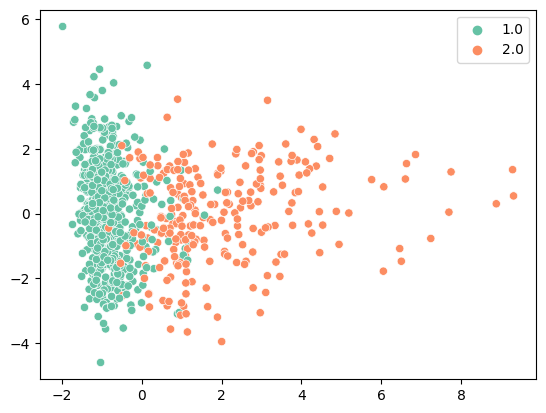

In [17]:
#check if its blanced // since the purpose of this cw is to combine 2 and 3, 
#this will be binary classification

dataPCA['Diagnosis'] = dataPCA['Diagnosis'].replace(3, 2)

print(dataPCA['Diagnosis'].value_counts())

sns.scatterplot(x = list(dataPCA['PC1']), y = list(dataPCA['PC2']), 
                hue = list(dataPCA['Diagnosis']), palette = 'Set2')



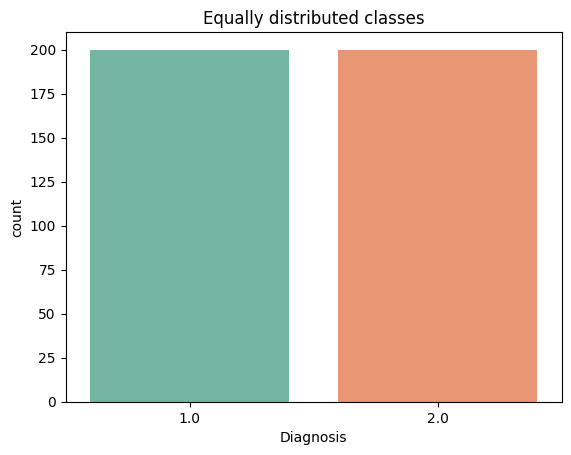

In [18]:
#random under sampling - create 100 samples without replacement for each label

df = dataPCA.sample(frac=1,random_state=1)

labelOne = df.loc[df['Diagnosis'] == 1][:200]
labelTwo = df.loc[df['Diagnosis'] == 2][:200]

sampleDf = pd.concat([labelOne, labelTwo])

#shuffle the new sample df
newDf = sampleDf.sample(frac=1, random_state=1)

sns.countplot(x = newDf['Diagnosis'], palette='Set2')
plt.title("Equally distributed classes")
plt.show()


<AxesSubplot: >

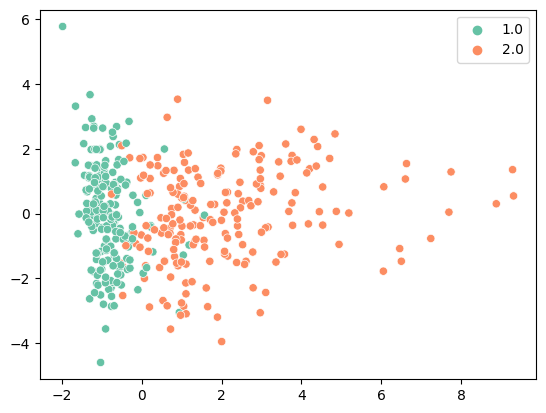

In [28]:

sns.scatterplot(x = list(newDf['PC1']), y = list(newDf['PC2']), 
                hue = list(newDf['Diagnosis']), palette = 'Set2')

<AxesSubplot: >

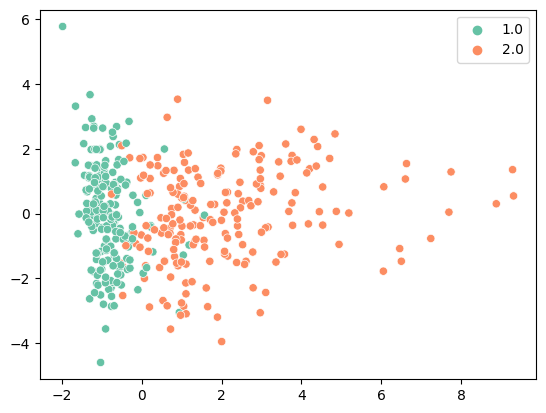

In [28]:

sns.scatterplot(x = list(newDf['PC1']), y = list(newDf['PC2']), 
                hue = list(newDf['Diagnosis']), palette = 'Set2')

In [19]:
#split the x and y variables 

X = newDf.drop('Diagnosis', axis = 1)

y = newDf['Diagnosis'].map({1: 1, 2: 0}) # 1 is HC and 2 is Non-HC

In [20]:
# train test split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state=1)

#turn the values into an array 

#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

y_test


608    0
345    1
613    0
106    1
727    0
      ..
337    0
48     0
731    1
35     1
412    0
Name: Diagnosis, Length: 120, dtype: int64

In [21]:
#Implement the classifiers 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

classifiers = {
    "Logistic": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "SVC": SVC(),
}

# check cross val scores for each classifier

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 91.0 % accuracy score
Classifiers:  SVC Has a training score of 95.0 % accuracy score


In [22]:
# use grid search cv to find the best parameters for each 

from sklearn.model_selection import GridSearchCV

                                #Logistic Regression 
log_reg_params = {
    "penalty": ['l1', 'l2'], 
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, verbose = True)
grid_log_reg.fit(X_train, y_train)

#prediction
logProba = grid_log_reg.predict_proba(X_test)[::,1]
logPred = grid_log_reg.predict(X_test)

# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Logistic Regression Cross Validation Score: ', 
      round(log_reg_score.mean() * 100, 2).astype(str) + '%')

                                #K-nearest neighbors
knears_params = {
    "n_neighbors": list(range(2,5,1)), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

#prediction
kProba = grid_knears.predict_proba(X_test)[::,1]
kPred = grid_knears.predict(X_test)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

                                    #SVC
svc_params = {
    'C': [0.5, 0.7, 0.9, 1], 
    'kernel': ['linear']
}
grid_svc = GridSearchCV(SVC(probability = True), svc_params, refit = True)
grid_svc.fit(X_train, y_train)

#prediction
svcProba = grid_svc.predict_proba(X_test)[::,1]
svcPred = grid_svc.predict(X_test)

# SVC best estimator
svc = grid_svc.best_estimator_

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', 
      round(svc_score.mean() * 100, 2).astype(str) + '%')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression Cross Validation Score:  95.0%
Knears Neighbors Cross Validation Score 93.57%
Support Vector Classifier Cross Validation Score 95.0%


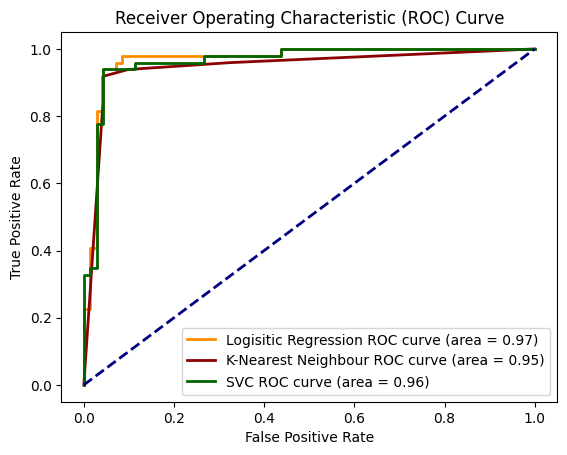

In [23]:
#in order to choose the best classifier we will use roc curve 
#plot the roc curve for the three algorithms

import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, auc

#Logistic proba
fpr, tpr, _ = metrics.roc_curve(y_test,  logProba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Logisitic Regression ROC curve (area = %0.2f)' % roc_auc)

#decision tree proba
fpr, tpr, _ = metrics.roc_curve(y_test,  kProba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkred', lw=2, label='K-Nearest Neighbour ROC curve (area = %0.2f)' % roc_auc)

#decision tree proba
fpr, tpr, _ = metrics.roc_curve(y_test,  svcProba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='SVC ROC curve (area = %0.2f)' % roc_auc)

# Plotting the ROC curve

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[68  3]
 [ 3 46]]


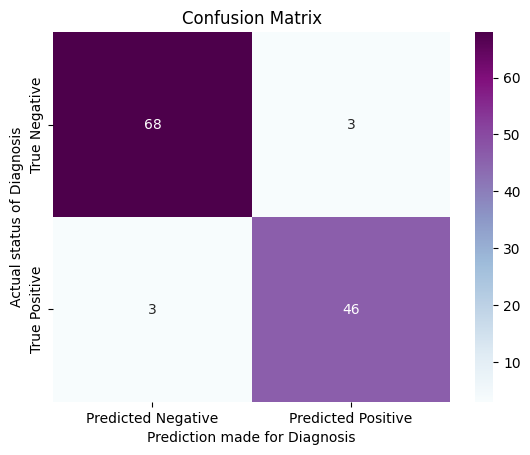

In [24]:
# a deeper look into logistic regression using confusion matrix

from sklearn.metrics import confusion_matrix

ConfusionMatrix = confusion_matrix(y_test, logPred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Prediction made for Diagnosis')
ax.set_ylabel('Actual status of Diagnosis');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['Predicted Negative','Predicted Positive'])
ax.yaxis.set_ticklabels(['True Negative','True Positive'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
#classification report 

from sklearn.metrics import classification_report

print('Logistic Regression classifier:')
print(classification_report(y_test, logPred))

Logistic Regression classifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.94      0.94      0.94        49

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



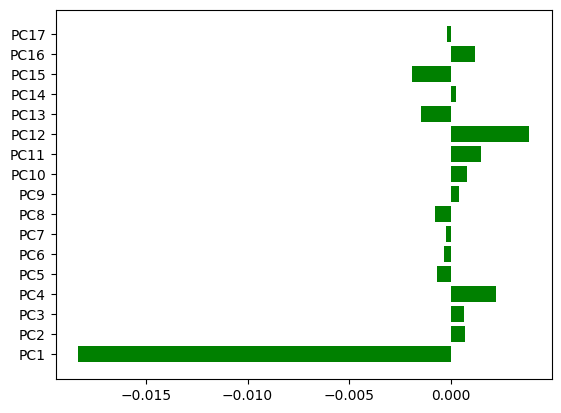

In [26]:
test = log_reg.coef_.flatten()
plt.barh(X.columns, test, color = "g")
plt.show()

In [27]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
logit_model = sm.Logit(y_train,X_train2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.141267
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  280
Model:                          Logit   Df Residuals:                      262
Method:                           MLE   Df Model:                           17
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                  0.7953
Time:                        02:48:04   Log-Likelihood:                -39.555
converged:                       True   LL-Null:                       -193.22
Covariance Type:            nonrobust   LLR p-value:                 3.463e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3844      0.519      0.740      0.459      -0.633       1.402
PC1           -3.6114      0